In [7]:
import os
import openpyxl
import boto3
import pandas as pd
import io

In [21]:
bucket_name = 'trashback-data'
test_folder_key = 'sorted_images_test/'
train_folder_key = 'sorted_images/'
excel_file_key = 'waste_pics.xlsx'


s3 = boto3.client('s3')

excel_obj = s3.get_object(Bucket=bucket_name, Key=excel_file_key)
excel_data = pd.read_excel(io.BytesIO(excel_obj['Body'].read()))

excel_data.dropna(subset=['PIC_NAME'], inplace=True)

In [7]:
from data_processing import list_keys

keys = list_keys(bucket_name,train_folder_key)
keys_test = list_keys(bucket_name,test_folder_key)  

In [22]:
from data_processing import create_dictionnaries

category_files,image_labels,image_sub_labels = create_dictionnaries(excel_data)
categories = excel_data['WASTE_TYPE'].unique()


In [23]:
print('Categories:',categories)

Categories: ['Plastique' 'Mégots' 'Papier ou Carton' 'Textile' 'Métaux' 'Verre'
 'Matières Organiques']


In [17]:
dict_of_images = {}
dict_filenames = {}
dict_of_categories = {}

for category in categories:
    dict_of_categories[category] = []

for key in keys:
    filename = key.split('/')[-1]
    category,sub_category = key.split('/')[-3],key.split('/')[-2]
    dict_of_images[key] = category + '/' + sub_category
    dict_filenames[filename] = category #+ '/' + sub_category
    if category in categories:

        dict_of_categories[category].append(filename)

for key in keys_test:
    filename = key.split('/')[-1]
    category,sub_category = key.split('/')[-3],key.split('/')[-2]
    dict_of_images[key] = category + '/' + sub_category
    dict_filenames[filename] = category #+ '/' + sub_category
    if category in categories:

        dict_of_categories[category].append(filename)

NameError: name 'keys' is not defined

In [12]:
path = '/Users/macbook/Desktop/Trashback_resized_620'
resized_images = os.listdir(path)
dict_of_categories = {}

In [13]:
excel_data.head()

,CREATED,PIC_NAME,WASTE_TYPE,WASTE_SUB_TYPE
0,2023-07-18 02:41:23,1689655283310-image1689655288912.jpg,Plastique,Bouteille en plastique
1,2023-07-18 03:03:52,1689656632003-image1689656604097.jpg,Mégots,Mégots
2,2023-07-18 03:04:23,1689656663316-image1689656670630.jpg,Papier ou Carton,Récipient liquide
3,2023-07-18 03:07:22,1689656842073-image1689656841084.jpg,Mégots,Mégots
4,2023-07-18 03:10:33,1689657033386-image1689657030920.jpg,Plastique,Polystyrène


In [14]:
path = '/Users/macbook/Desktop/Trashback_resized_620'
resized_images = os.listdir(path)
dict_of_categories = {}
dict_filenames = {}



for category in categories:
    dict_of_categories[category] = []

for image in resized_images:
    category,sub_category = excel_data[excel_data['PIC_NAME'] == image]['WASTE_TYPE'].values[0],excel_data[excel_data['PIC_NAME'] == image]['WASTE_SUB_TYPE'].values[0]
    dict_filenames[image] = category
    if category in categories:
        dict_of_categories[category].append(image)

KeyboardInterrupt: 

In [26]:
print('Number of images in each category:')
for category in category_files.keys():
    print(category,len(category_files[category]))

Number of images in each category:
Plastique 2000
Mégots 2000
Papier ou Carton 2000
Textile 1446
Métaux 2000
Verre 2000
Matières Organiques 338


In [25]:
for category in categories:
    category_files[category] = category_files[category][0:2000]

In [27]:
# we export this dictionnary to a json file

import json
import shutil


with open('category_files.json', 'w') as fp:
    json.dump(category_files, fp)

with open('image_labels.json', 'w') as fp:
    json.dump(image_labels, fp)

# we also create a folder with the filenames in each category

'''for category in categories:
    os.mkdir('data/'+category)'''

"for category in categories:\n    os.mkdir('data/'+category)"

In [ ]:
available_files = os.listdir('/Users/macbook/Desktop/Trashback_resized_620')


target_path = '/Users/macbook/Desktop/Trashback_2000_620v2'
base_path = '/Users/macbook/Desktop/Trashback_resized_620'
for category in category_files.keys():
    for filename in category_files[category]:
        source = base_path + '/' + filename
        target = target_path + '/' + filename

        if filename in available_files:
        # we copy the file 

            shutil.copy(source, target)

            #we remove the file from the folder source 


In [ ]:
with open('category_files.json', 'r') as fp:
    category_files = json.load(fp)

# according to the labels, we organize the data into folders
for category in categories:
    os.mkdir('data/'+category)

for category in categories:
    for filename in category_files[category]:
        source = '/Users/macbook/Desktop/Trashback_resized_620/' + filename
        target = 'data/' + category + '/' + filename
        shutil.copy(source, target)
    
        # we remove the copied file 

        os.remove(source)


In [27]:
dir_path = "/Users/macbook/Desktop/Trashback2000_resized"
original_dir = "/Users/macbook/Desktop/Trashback_resized"

#copy the selected files into the folder in dir_path

import shutil

'''for category in categories:
    os.mkdir(dir_path + '/' + category)'''

for category in categories:
    for filename in dict_of_categories[category]:
        if filename != '' and filename in os.listdir(original_dir):

            shutil.copy(original_dir + '/' + filename, dir_path + '/' + category + '/' + filename)

In [4]:
target_path = '/Users/macbook/Desktop/Trashback_2000_620'


In [2]:
import os

In [5]:
# the upload has been interupted, we need to upload the files again, but not all

# we read the imported files:
import pickle
with open('../../images_imported.pkl', 'rb') as f:
    images_imported = pickle.load(f)

#we remove the files that have been imported

list_files = os.listdir(target_path)

for filename in images_imported:
    if filename in list_files:

        os.remove(target_path + '/' + filename)



In [18]:
print(len(os.listdir(target_path)))

total = 0
for category in categories:
    total+=len(category_files[category])

print('Total:',total)
print(total-len(os.listdir(target_path)))

691
Total: 13268
12577


In [19]:
import boto3
import os
import s3fs

s3 = s3fs.S3FileSystem(anon=True)

s3.ls('trashback-data')

PermissionError: Access Denied

In [ ]:
#empty the folders of the dir_path

for category in categories:
    for filename in dict_of_categories[category]:
        if filename != '':
            os.remove(dir_path + '/'+ filename)

In [53]:
!aws s3 cp /Users/macbook/Desktop/Trashback1000 s3://trashback-data/trashback1000 --recursive

upload: ../../../../Trashback1000/.DS_Store to s3://trashback-data/trashback1000/.DS_Store
upload: ../../../../Trashback1000/Matières Organiques/1690442774346-user.jpg to s3://trashback-data/trashback1000/Matières Organiques/1690442774346-user.jpg
upload: ../../../../Trashback1000/Matières Organiques/1690460137723-image1690460053578.jpg to s3://trashback-data/trashback1000/Matières Organiques/1690460137723-image1690460053578.jpg
upload: ../../../../Trashback1000/Matières Organiques/1689954925080-image1689954931709.jpg to s3://trashback-data/trashback1000/Matières Organiques/1689954925080-image1689954931709.jpg
upload: ../../../../Trashback1000/Matières Organiques/1690523230919-image1690523230826.jpg to s3://trashback-data/trashback1000/Matières Organiques/1690523230919-image1690523230826.jpg
upload: ../../../../Trashback1000/Matières Organiques/1690523275960-image1690523276792.jpg to s3://trashback-data/trashback1000/Matières Organiques/1690523275960-image1690523276792.jpg
upload: ../.

'/Users/macbook/Desktop/WasteScan/waste-scan/models/trashback'

In [22]:
from data_resizing_pipeline import resize_images

In [ ]:
pwd

'/Users/macbook/Desktop/WasteScan/waste-scan/models/trashback'

In [24]:
size = (640,640)
input_folder = '/Users/macbook/Desktop/Trashback_p2'
output_folder = '/Users/macbook/Desktop/Trashback_resized_620'

resize_images(input_folder, output_folder, size)

Some code to finish the importation of some data in aws


/Users/macbook/Desktop/WasteScan/waste-scan


In [18]:
import pickle

# Chargez la liste des images importées depuis le fichier
with open("images_imported.pkl", "rb") as f:
    images_imported = pickle.load(f)

# Affichez les noms des images importées
print(images_imported)

['1693981812635-image1693981768333.jpg', '1691743116193-image1691743113090.jpg', '1697877119741-image1697877107251.jpg', '1694346191013-image1694346152152.jpg', '1691684604812-image1691684624037.jpg', '1697719904680-image1697719902326.jpg', '1694966119065-image1694966103489.jpg', '1697549147673-user.jpg', '1696071495046-image1696071481327.jpg', '1694537101484-user.jpg', '1693731860054-user.jpg', '1693582344826-image1693582249865.jpg', '1693402969196-image1693402476006.jpg', '1692039821192-user.jpg', '1693505907879-user.jpg', '1696667001103-image1696667012977.jpg', '1696057012858-image1696056979841.jpg', '1694586119685-user.jpg', '1693464242129-user.jpg', '1696179127694-image1696179104458.jpg', '1698040909523-image1698040897230.jpg', '1694436702351-image1694436630992.jpg', '1692886340679-user.jpg', '1697835027212-image1697835028551.jpg', '1692686500028-user.jpg', '1692781114054-image1692781144948.jpg', '1694104792163-user.jpg', '1696432244899-image1696432228919.jpg', '1692431984905-imag

In [19]:
import os
import shutil
base_path = '/Users/macbook/Desktop/Trashback_toupload'
path_to_upload = '/Users/macbook/Desktop/Trashback2000_resized/Verre'

image_to_import = os.listdir(path_to_upload)

#we create the directory for base_path

os.makedirs(base_path, exist_ok=True)


for image in image_to_import:
    if image not in images_imported:
        shutil.copy(path_to_upload + '/' + image, base_path + '/' + image)

In [21]:
print(len(os.listdir(base_path)))

684


In [27]:
image_path = '/Users/macbook/Desktop/Trashback/1689921666174-user.jpg'

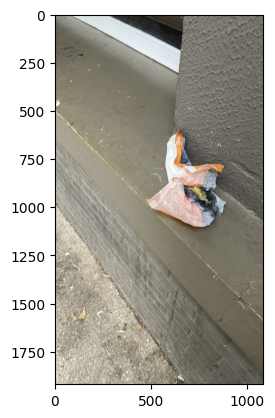

In [29]:
#we display the image in the notebook

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(image_path)
plt.imshow(img)


In [30]:
# import the inference-sdk
from inference_sdk import InferenceHTTPClient
from PIL import Image
import matplotlib.pyplot as plt

# initialize the client
CLIENT = InferenceHTTPClient(
    api_url="http://detect.roboflow.com",
    api_key="RK9Ar3DxBeehonJH6JdB"
)

# infer on a local image
result = CLIENT.infer(image_path, model_id="trashbackclassifierv1/1")

img = Image.open(image_path)
plt.imshow(img)

prediction = result['predictions'][0]['class']
print(f'Classe prédite : {prediction}')